2025/03/10 12:44:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


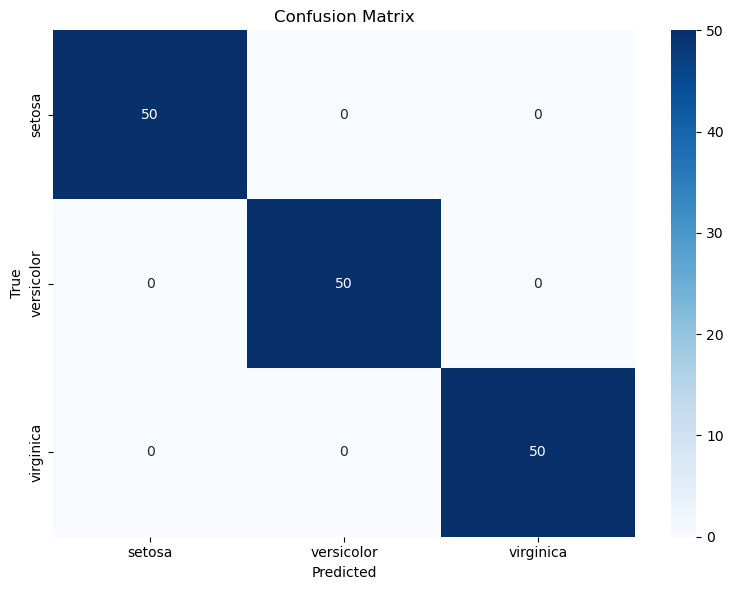

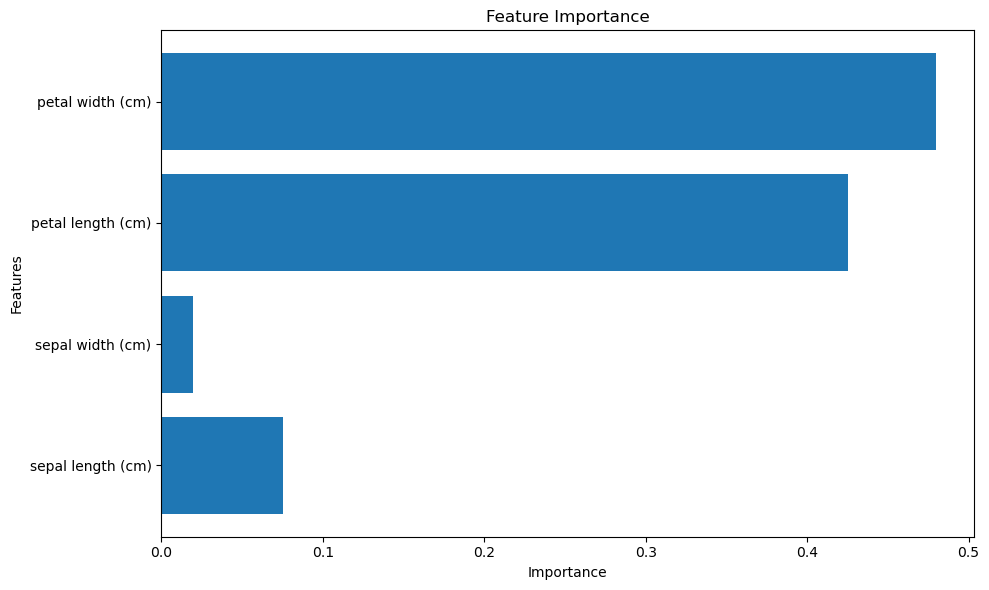

In [2]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Start MLflow run
with mlflow.start_run():

    # Define the dataset and load the Iris data
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Log the dataset used
    mlflow.log_param("dataset", "Iris")
    mlflow.log_param("features", list(iris.feature_names))
    mlflow.log_param("target", iris.target_names.tolist())

    # Step 1: Data Preprocessing - Check for missing values
    # We're imputing missing values in the dataset if they exist
    imputation_strategy = "mean"
    imputer = SimpleImputer(strategy=imputation_strategy)

    # Check and impute missing values
    X = imputer.fit_transform(X)
    mlflow.log_param("imputation_strategy", imputation_strategy)

    # Justification for imputation strategy
    justification_imputation = """
    Chose mean imputation strategy as the dataset contains numerical values that are missing randomly,
    and the mean is expected to provide an unbiased estimate.
    """
    with open("justification_imputation.txt", "w") as f:
        f.write(justification_imputation)
    mlflow.log_artifact("justification_imputation.txt")

    # Step 2: Standardization of Features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Log the scaling method used
    mlflow.log_param("scaling_method", "StandardScaler")

    # Justification for scaling method
    justification_scaling = """
    Used StandardScaler to normalize the features and improve the model's ability to learn, 
    especially when working with distance-based algorithms like Random Forest.
    """
    with open("justification_scaling.txt", "w") as f:
        f.write(justification_scaling)
    mlflow.log_artifact("justification_scaling.txt")

    # Step 3: Train the model (Random Forest)
    model_choice = "RandomForestClassifier"
    model = RandomForestClassifier(n_estimators=100, max_depth=10)
    model.fit(X, y)

    # Log model parameters and choice
    mlflow.log_param("model_choice", model_choice)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Justification for model choice
    justification_model_choice = """
    Chose Random Forest Classifier due to its robustness in handling non-linear relationships, 
    and its ability to handle both categorical and numerical features. It also performs well on small datasets.
    """
    with open("justification_model_choice.txt", "w") as f:
        f.write(justification_model_choice)
    mlflow.log_artifact("justification_model_choice.txt")

    # Step 4: Evaluate the model
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    mlflow.log_metric("accuracy", accuracy)

    # Log additional evaluation metrics such as confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Step 5: Log feature importance (for Random Forest)
    feature_importance = model.feature_importances_
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(iris.feature_names, feature_importance)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")

    # Log the model
    mlflow.sklearn.log_model(model, "model")

    # Step 6: Save a JSON file with decision-making transparency
    transparency_details = {
        "dataset": {
            "name": "Iris",
            "features": list(iris.feature_names),
            "target": iris.target_names.tolist()
        },
        "data_preprocessing": {
            "imputation_strategy": imputation_strategy,
            "justification_imputation": justification_imputation,
            "scaling_method": "StandardScaler",
            "justification_scaling": justification_scaling
        },
        "model": {
            "model_choice": model_choice,
            "n_estimators": 100,
            "max_depth": 10,
            "justification_model_choice": justification_model_choice
        },
        "evaluation": {
            "accuracy": accuracy,
            "confusion_matrix_artifact": "confusion_matrix.png",
            "feature_importance_artifact": "feature_importance.png"
        }
    }

    # Save the transparency details as a JSON artifact
    with open("transparency_details.json", "w") as json_file:
        json.dump(transparency_details, json_file, indent=4)
    mlflow.log_artifact("transparency_details.json")

# After this, you can view the transparency details in the MLflow UI, including all decisions and artifacts.
